<a href="https://colab.research.google.com/github/blwolhppt/ML/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Контрольная работа**

In [41]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

data = fetch_openml('cloud')



/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name cloud exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**№2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.**

In [42]:
X = data.data
y = data.target

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seeded  108 non-null    category
 1   season  108 non-null    category
 2   NC      108 non-null    float64 
 3   SC      108 non-null    float64 
 4   NWC     108 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 3.2 KB


In [44]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 108 entries, 0 to 107
Series name: TE
Non-Null Count  Dtype  
--------------  -----  
108 non-null    float64
dtypes: float64(1)
memory usage: 992.0 bytes


In [45]:
X.describe()

,NC,SC,NWC
count,108.000000,108.000000,108.000000
mean,1.506389,1.202130,2.192870
std,1.431687,0.891783,1.632942
min,0.000000,0.020000,0.040000
25%,0.410000,0.535000,0.882500
50%,1.285000,0.995000,1.915000
75%,2.132500,1.662500,3.050000
max,9.420000,4.020000,7.840000


In [46]:
y.describe()

count    108.000000
mean       1.232593
std        1.077179
min        0.000000
25%        0.512500
50%        0.910000
75%        1.675000
max        6.000000
Name: TE, dtype: float64

**№3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.**

In [47]:
X

,seeded,season,NC,SC,NWC
0,S,AUTUMN,1.65,1.80,3.33
1,U,AUTUMN,1.09,0.79,1.59
2,S,WINTER,2.39,0.36,2.06
3,U,WINTER,2.96,1.27,4.05
4,S,WINTER,4.16,2.16,6.00
...,...,...,...,...,...
103,U,SPRING,1.38,1.86,2.91
104,S,SPRING,1.22,2.28,1.58
105,U,SPRING,2.46,2.47,2.39
106,S,SPRING,0.05,0.02,0.09


 **№4. Удалите, если нужно, нечисловые колонки в датасете.**

**№5. При необходимости заполните нулем пропущенные значения.**

In [48]:
X.isna().any() 

seeded    False
season    False
NC        False
SC        False
NWC       False
dtype: bool

In [49]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imp.fit_transform(X)

array([['S', 'AUTUMN', 1.65, 1.8, 3.33],
       ['U', 'AUTUMN', 1.09, 0.79, 1.59],
       ['S', 'WINTER', 2.39, 0.36, 2.06],
       ['U', 'WINTER', 2.96, 1.27, 4.05],
       ['S', 'WINTER', 4.16, 2.16, 6.0],
       ['U', 'WINTER', 2.76, 0.87, 4.17],
       ['U', 'WINTER', 1.08, 0.85, 3.45],
       ['S', 'WINTER', 0.26, 0.47, 0.9],
       ['U', 'SPRING', 2.53, 1.08, 3.65],
       ['S', 'SPRING', 2.76, 3.1, 5.06],
       ['S', 'SPRING', 1.07, 0.64, 1.95],
       ['U', 'SPRING', 1.42, 1.08, 1.22],
       ['S', 'SPRING', 0.24, 0.44, 0.94],
       ['U', 'SPRING', 0.7, 0.67, 0.94],
       ['S', 'SUMMER', 0.97, 1.66, 2.21],
       ['U', 'SUMMER', 1.06, 1.13, 1.46],
       ['S', 'SUMMER', 0.13, 0.27, 0.35],
       ['U', 'SUMMER', 0.1, 0.3, 0.34],
       ['U', 'SUMMER', 0.38, 0.58, 0.67],
       ['S', 'SUMMER', 0.45, 0.43, 0.44],
       ['S', 'AUTUMN', 0.42, 0.47, 0.53],
       ['U', 'AUTUMN', 2.24, 4.02, 2.52],
       ['U', 'AUTUMN', 0.52, 1.32, 2.18],
       ['S', 'AUTUMN', 0.94, 1.59, 1.73],

**№6. Постройте гистограммы распределения по каждому признаку.**

In [50]:
import pandas as pd

X = pd.get_dummies(X, drop_first=True, columns=['seeded','season'])



In [51]:
X

,NC,SC,NWC,seeded_U,season_SPRING,season_SUMMER,season_WINTER
0,1.65,1.80,3.33,0,0,0,0
1,1.09,0.79,1.59,1,0,0,0
2,2.39,0.36,2.06,0,0,0,1
3,2.96,1.27,4.05,1,0,0,1
4,4.16,2.16,6.00,0,0,0,1
...,...,...,...,...,...,...,...
103,1.38,1.86,2.91,1,1,0,0
104,1.22,2.28,1.58,0,1,0,0
105,2.46,2.47,2.39,1,1,0,0
106,0.05,0.02,0.09,0,1,0,0


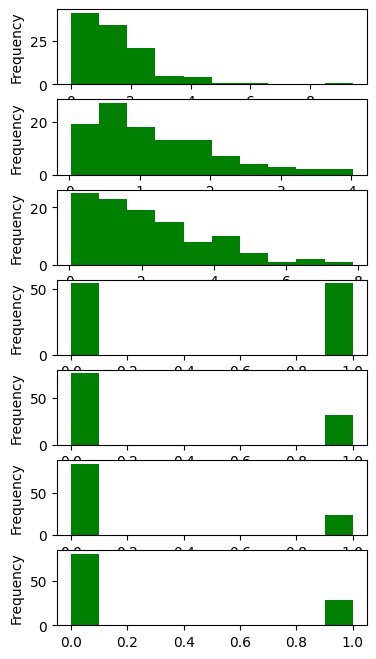

In [52]:
fig, axes = plt.subplots(len(X.columns), 1, figsize=(4, 8))

for i, col in enumerate(X.columns):
    X[col].plot(kind='hist', bins=10, ax=axes[i], color='green')

**№7. Постройте модель машинного обучения, обучите ее на всем датасете.**

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)


**№8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.**

In [54]:
model.score(X, y)

0.8907964318747388

**№9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.**


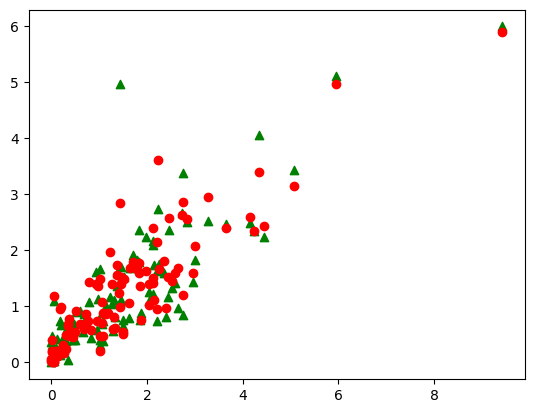

In [55]:
plt.scatter(X.iloc[:, 0], y, color='green', marker='^') # реальные значения
plt.scatter(X.iloc[:, 0], y_pred, color='red', marker='o') # предсказанные значения

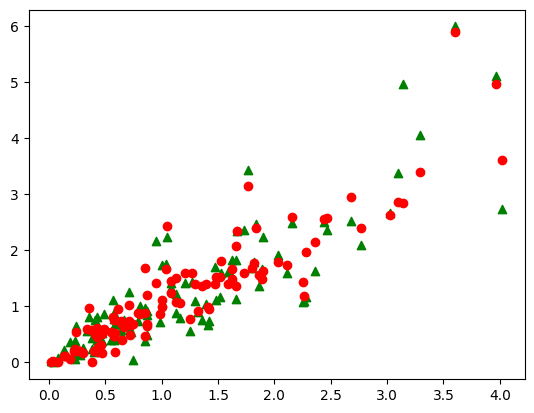

In [56]:
plt.scatter(X.iloc[:, 1], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 1], y_pred, color='red', marker='o')  # предсказанные значения

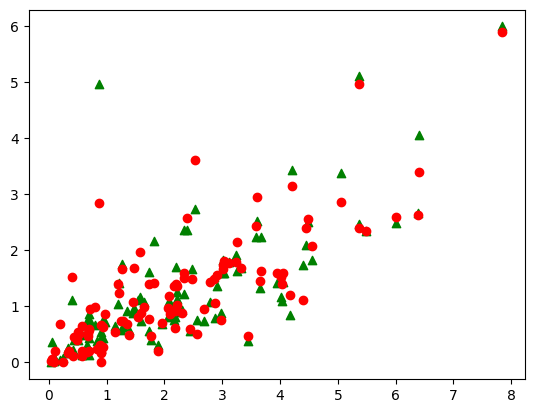

In [57]:
plt.scatter(X.iloc[:, 2], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 2], y_pred, color='red', marker='o')  # предсказанные значения

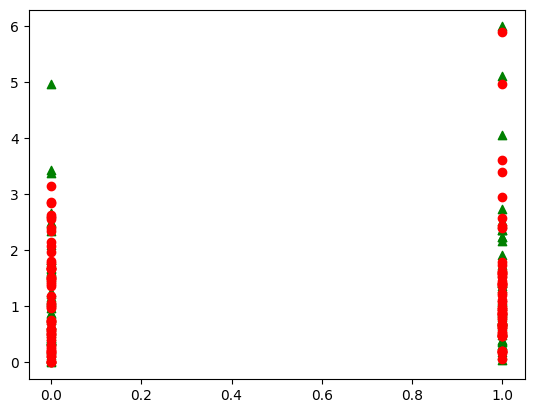

In [58]:
plt.scatter(X.iloc[:, 3], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 3], y_pred, color='red', marker='o')  # предсказанные значения

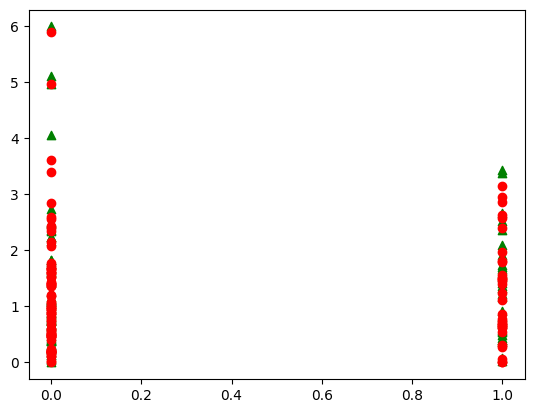

In [61]:
plt.scatter(X.iloc[:, 4], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 4], y_pred, color='red', marker='o')  # предсказанные значения

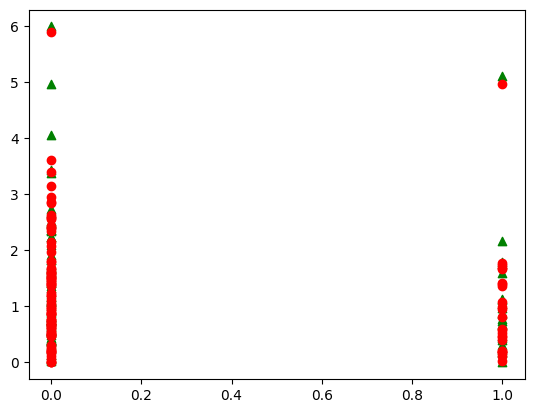

In [62]:
plt.scatter(X.iloc[:, 5], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 5], y_pred, color='red', marker='o')  # предсказанные значения

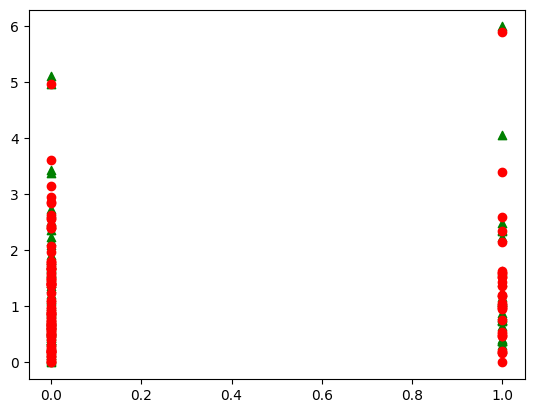

In [63]:
plt.scatter(X.iloc[:, 6], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 6], y_pred, color='red', marker='o')  # предсказанные значения

**№10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.**


In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X, y)
forest_model.score(X, y)

0.9759187600181998

In [60]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X, y)
ridge_model.score(X, y)

0.8906271942440703